In [1]:
import os
import numpy as np
import pandas as pd
import scipy.sparse as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import accuracy_score, f1_score, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

print('Библиотеки загружены')

Библиотеки загружены


In [2]:
reg_data = pd.read_csv('audi.csv')
class_data = pd.read_csv('weatherAUS.csv')

# Regression

In [3]:
reg_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
reg_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


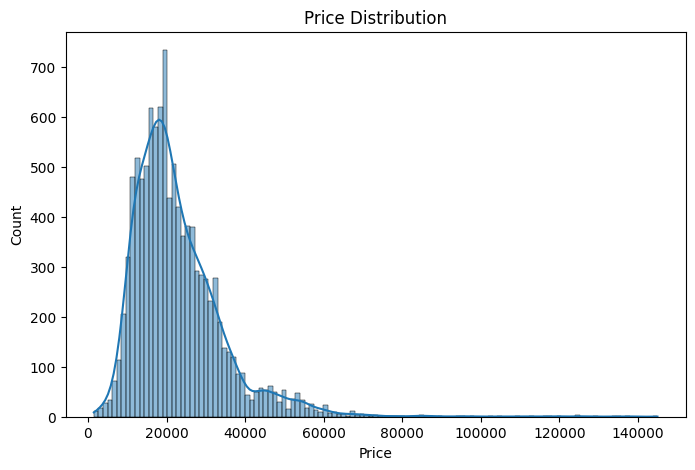

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(reg_data['price'], bins='auto', kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [7]:
reg_data = reg_data[reg_data['price'] < 75000]

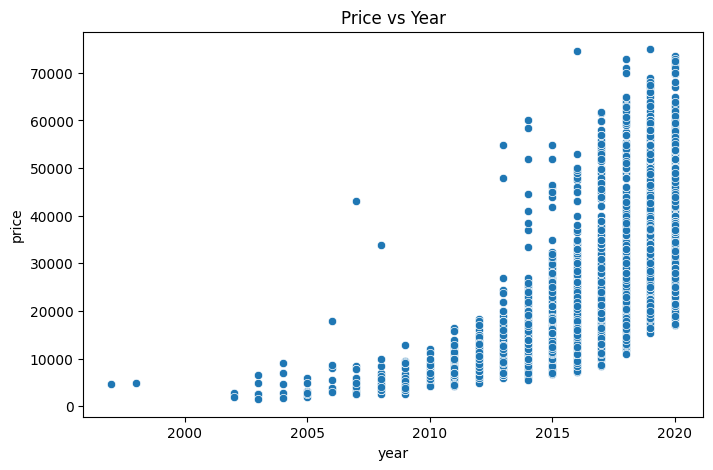

In [8]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=reg_data, x='year', y='price')
plt.title('Price vs Year')
plt.show()

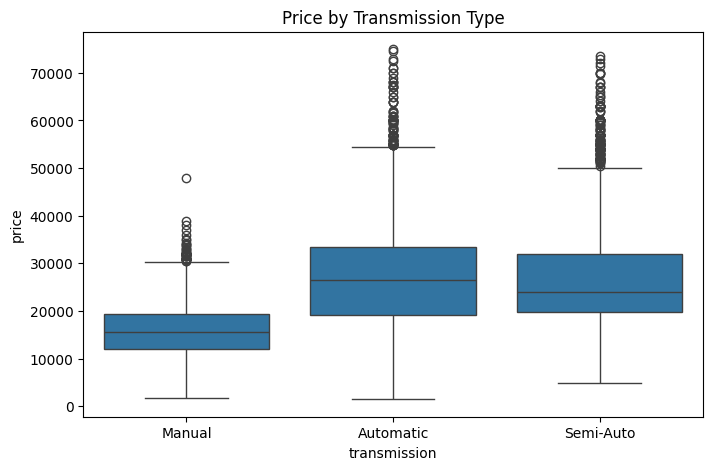

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(data=reg_data, x='transmission', y='price')
plt.title('Price by Transmission Type')
plt.show()

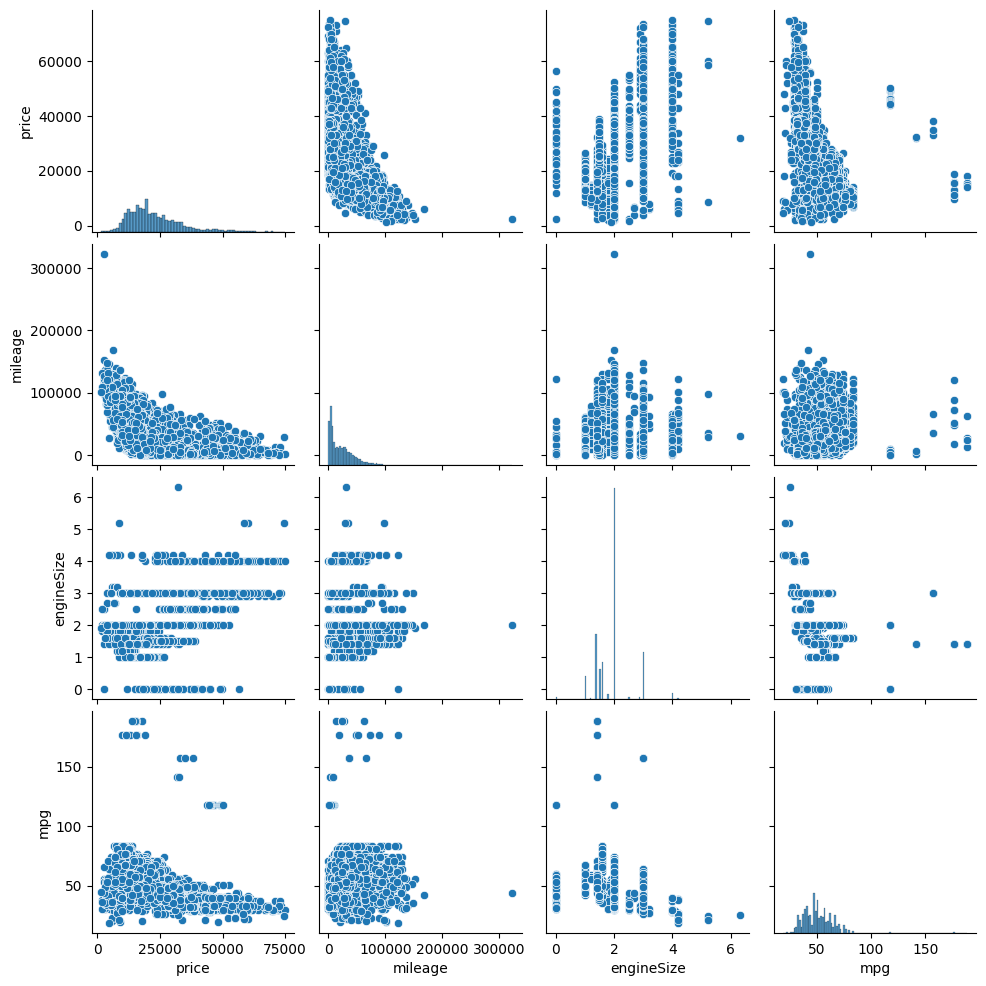

In [10]:
sns.pairplot(reg_data[['price', 'mileage', 'engineSize', 'mpg']])
plt.show()

In [11]:
str_cols = ['model', 'transmission', 'fuelType']
num_cols = ['year', 'mileage', 'engineSize', 'mpg', 'tax']
target_col = 'price'

In [12]:
te = TargetEncoder()
scaler = StandardScaler()

In [13]:
X = reg_data.drop('price', axis=1)
y = reg_data['price']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LinearRegression()

In [16]:
transformer = ColumnTransformer(transformers=[
    ('scaler', scaler, num_cols),
    ('cat', te, str_cols)
])


full_pipe = Pipeline([('preprocessing', transformer), ('model', model)])


full_pipe.fit(X_train, y_train)

/Users/anatolii/Универ/ИИ_фреймворки/.venv/lib/python3.14/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [17]:
y_pred = full_pipe.predict(X_test)

In [18]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))

RMSE: 4054.855548417133
MAE: 2752.214559287002
R2: 0.8534979705659869
MSE: 16441853.518529208


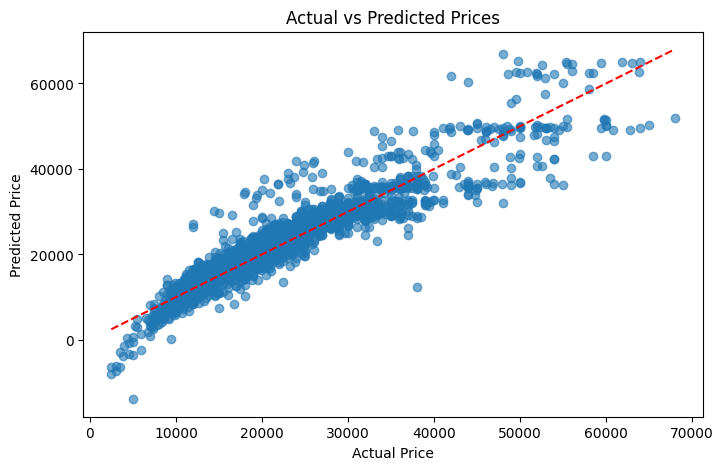

In [19]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [20]:
class LinearRegressor:
    
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X, y, iterations=1000, learning_rate=0.01):
        X_arr = X.values if hasattr(X, 'values') else np.asarray(X)
        y_arr = y.values if hasattr(y, 'values') else np.asarray(y)
        
        if X_arr.ndim == 1:
            X_arr = X_arr.reshape(-1, 1)
        
        # Добавляем столбец единиц для intercept
        X_with_intercept = np.column_stack([np.ones(X_arr.shape[0]), X_arr])
        
        for i in range(iterations):
            predictions = X_with_intercept @ np.concatenate(([self.intercept_], self.coef_)) if self.coef_ is not None else np.zeros(X_with_intercept.shape[0])
            errors = predictions - y_arr
            gradients = (2 / X_arr.shape[0]) * (X_with_intercept.T @ errors)
            if self.coef_ is None:
                self.intercept_ = 0
                self.coef_ = np.zeros(X_arr.shape[1])
            self.intercept_ -= learning_rate * gradients[0]
            self.coef_ -= learning_rate * gradients[1:]
    
    def predict(self, X):
        X_arr = X.values if hasattr(X, 'values') else np.asarray(X)
        if X_arr.ndim == 1:
            X_arr = X_arr.reshape(-1, 1)
        
        return X_arr @ self.coef_ + self.intercept_

In [21]:
transformer = ColumnTransformer(transformers=[
    ('scaler', scaler, num_cols),
    ('cat', te, str_cols)
])

full_pipe_custom = Pipeline([('preprocessing', transformer), ('model', LinearRegressor())])

In [22]:
full_pipe_custom.fit(X_train, y_train)

/Users/anatolii/Универ/ИИ_фреймворки/.venv/lib/python3.14/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [23]:
y_pred_custom = full_pipe_custom.predict(X_test)
print('Test RMSE custom:', np.sqrt(mean_squared_error(y_test, y_pred_custom)))
print('Test MAE custom:', mean_absolute_error(y_test, y_pred_custom))
print('Test R2 custom:', r2_score(y_test, y_pred_custom))

Test RMSE custom: 4806.255740926196
Test MAE custom: 3259.229871191964
Test R2 custom: 0.7941709744880117


## Добавим пару новых фич

### Датасет был обновлён в 2020 году, поэтому возраст считается относительно 2021, чтобы не было деления на ноль

In [24]:
X['age'] = 2021 - X['year']

In [25]:
X['MileagePerYear'] = X['mileage'] / X['age']

In [26]:
X.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,age,MileagePerYear
0,A1,2017,Manual,15735,Petrol,150,55.4,1.4,4,3933.75
1,A6,2016,Automatic,36203,Diesel,20,64.2,2.0,5,7240.60
2,A1,2016,Manual,29946,Petrol,30,55.4,1.4,5,5989.20
3,A4,2017,Automatic,25952,Diesel,145,67.3,2.0,4,6488.00
4,A3,2019,Manual,1998,Petrol,145,49.6,1.0,2,999.00


In [27]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
str_cols = X.select_dtypes(include=['object']).columns.tolist()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
transformer = ColumnTransformer(transformers=[
    ('scaler', scaler, num_cols),
    ('cat', te, str_cols)
])

model = LinearRegression()

full_pipe = Pipeline([('preprocessing', transformer), ('model', model)])

In [30]:
full_pipe.fit(X_train, y_train)

/Users/anatolii/Универ/ИИ_фреймворки/.venv/lib/python3.14/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [31]:
# Оценка на тестовой выборке
y_pred_test = full_pipe.predict(X_test)
print('Test RMSE (с новыми признаками):', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('Test MAE (с новыми признаками):', mean_absolute_error(y_test, y_pred_test))
print('Test R2 (с новыми признаками):', r2_score(y_test, y_pred_test))

Test RMSE (с новыми признаками): 3924.86231988571
Test MAE (с новыми признаками): 2686.795399121142
Test R2 (с новыми признаками): 0.8627407190031038


In [32]:
model_1 = Ridge(alpha=1.0)
model_2 = Lasso(alpha=1.0)
model_3 = ElasticNet(alpha=1.0, l1_ratio=0.5)

pipe_1 = Pipeline([('preprocessing', transformer), ('model', model_1)])
pipe_2 = Pipeline([('preprocessing', transformer), ('model', model_2)])
pipe_3 = Pipeline([('preprocessing', transformer), ('model', model_3)])

In [33]:
pipe_1.fit(X_train, y_train)
pipe_2.fit(X_train, y_train)
pipe_3.fit(X_train, y_train)

/Users/anatolii/Универ/ИИ_фреймворки/.venv/lib/python3.14/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/anatolii/Универ/ИИ_фреймворки/.venv/lib/python3.14/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/anatolii/Универ/ИИ_фреймворки/.venv/lib/python3.14/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/anatolii/Универ/ИИ_фреймворки/.venv/lib/python3.14/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/anatolii/Универ/ИИ_фреймворки/.venv/lib/python3.14/site-packages/sklearn/model_selection/_split.

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [34]:
y_pred_1 = pipe_1.predict(X_test)
y_pred_2 = pipe_2.predict(X_test)
y_pred_3 = pipe_3.predict(X_test)

In [35]:
print('Ridge RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_1)))
print('Lasso RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_2)))
print('ElasticNet RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_3)))

print('Ridge MAE:', mean_absolute_error(y_test, y_pred_1))
print('Lasso MAE:', mean_absolute_error(y_test, y_pred_2))
print('ElasticNet MAE:', mean_absolute_error(y_test, y_pred_3))

print("Ridge R2:", r2_score(y_test, y_pred_1))
print("Lasso R2:", r2_score(y_test, y_pred_2))
print("ElasticNet R2:", r2_score(y_test, y_pred_3))

Ridge RMSE: 4054.9423555965022
Lasso RMSE: 3797.377186486303
ElasticNet RMSE: 5294.686773807805
Ridge MAE: 2756.6080420359476
Lasso MAE: 2619.39078552258
ElasticNet MAE: 3515.103923413049
Ridge R2: 0.853491697807846
Lasso R2: 0.8715126594798884
ElasticNet R2: 0.750210940954563


# Classification

In [36]:
class_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [37]:
class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [38]:
class_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [39]:
class_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


/var/folders/d0/0j41qjnd51vdsqjbyvxmlgyh0000gn/T/ipykernel_12589/2046854377.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')


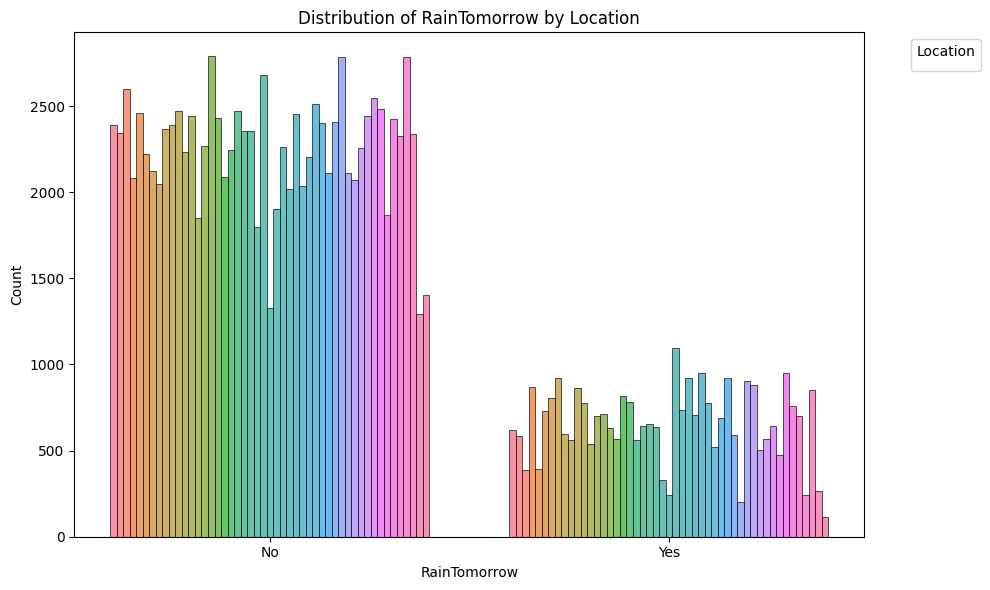

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(data=class_data, x='RainTomorrow', hue='Location', multiple='dodge', shrink=0.8)
plt.title('Distribution of RainTomorrow by Location')
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

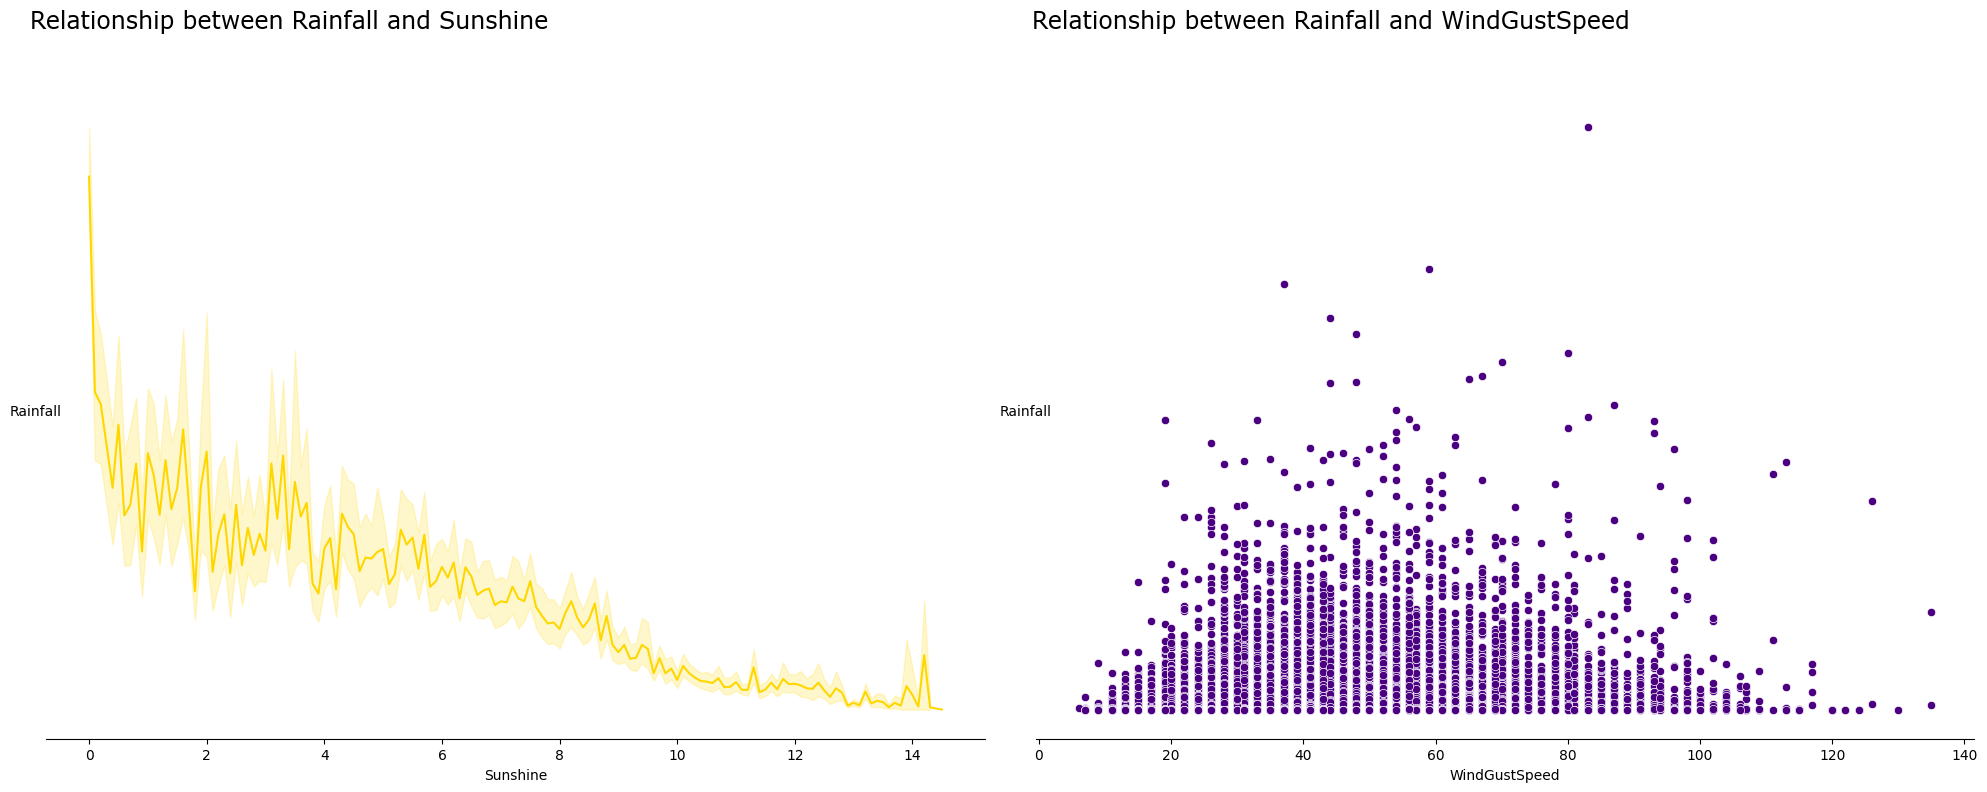

In [41]:
fig=plt.figure(figsize=(20,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for _ in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Rainfall and Sunshine",fontsize=17,fontweight='normal', fontfamily='Verdana')

ax[1].text(-1,430,"Relationship between Rainfall and WindGustSpeed",fontsize=17,fontweight='normal', fontfamily='Verdana')

sns.lineplot(data=class_data,x='Sunshine',y='Rainfall',ax=ax[0],color='#FFD700')
sns.scatterplot(data=class_data,x='WindGustSpeed',y='Rainfall',ax=ax[1],color='#4B0082')

for i in range(2):
    
    ax[i].set_ylabel('Rainfall').set_rotation(0)
    ax[i].set_yticklabels('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()
plt.show()

<Axes: xlabel='Cloud3pm', ylabel='Rainfall'>

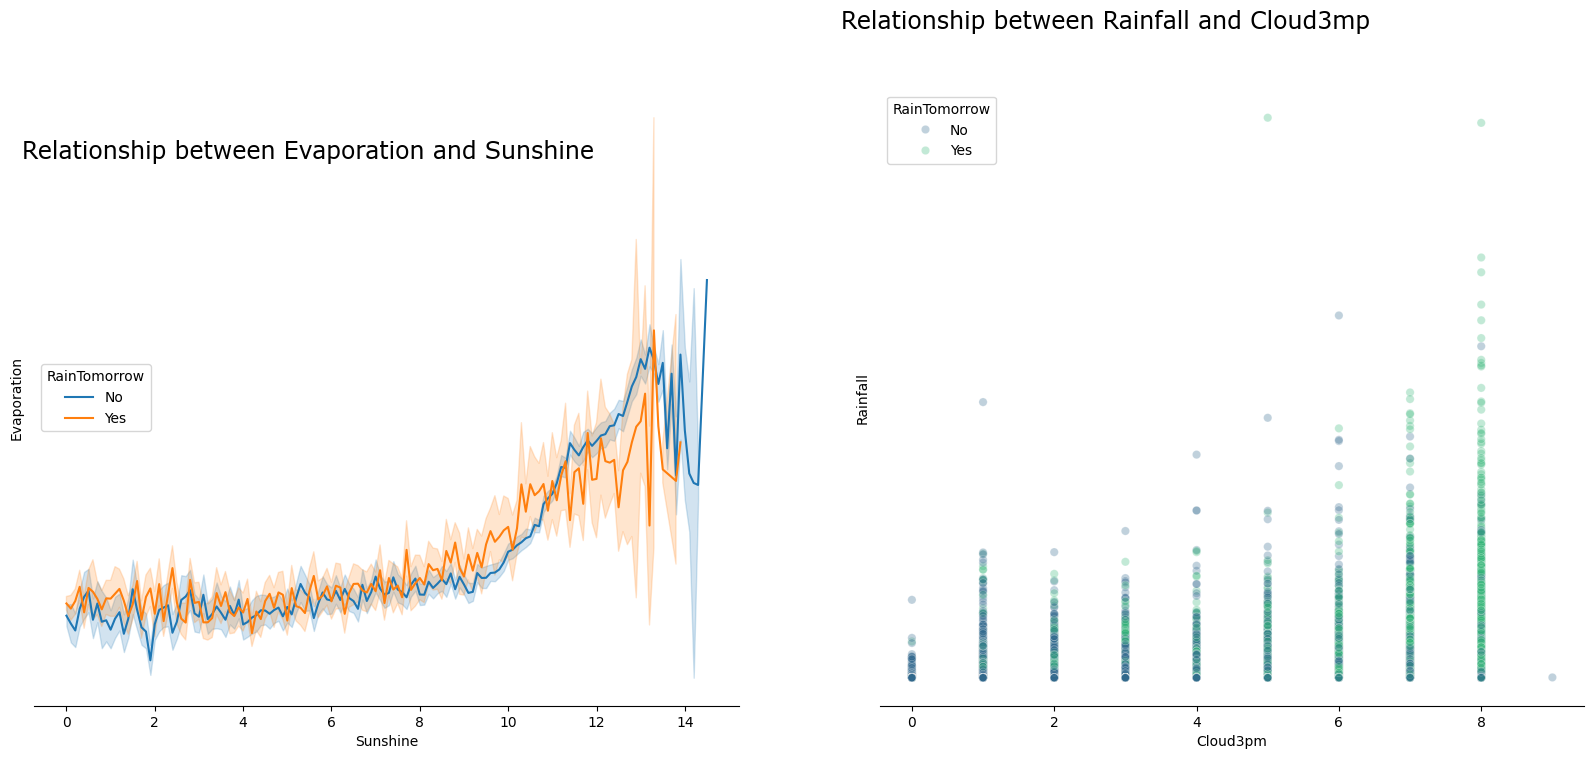

In [42]:
fig=plt.figure(figsize=(20,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for i in range(2)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Evaporation and Sunshine",fontsize=17,fontweight='normal', fontfamily='Verdana')

ax[1].text(-1,430,"Relationship between Rainfall and Cloud3mp",fontsize=17,fontweight='normal', fontfamily='Verdana')


for i in range(2):
    ax[i].set_yticklabels([])
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ["top","right", 'left']:
        ax[i].spines[direction].set_visible(False)

sns.lineplot(data=class_data,x='Sunshine',y='Evaporation',ax=ax[0],hue='RainTomorrow')
sns.scatterplot(data=class_data,x='Cloud3pm',y='Rainfall',hue='RainTomorrow',ax=ax[1],palette='viridis',markers='o',alpha=0.3)

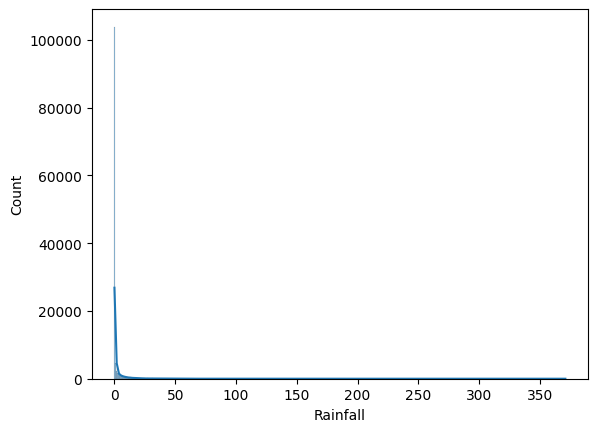

In [43]:
sns.histplot(data = class_data, x = 'Rainfall', bins = 'auto', kde = True);

<Axes: xlabel='MaxTemp', ylabel='Count'>

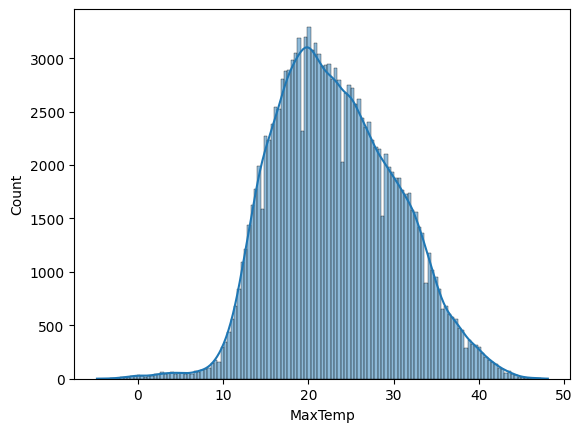

In [44]:
sns.histplot(data = class_data, x = 'MaxTemp', bins = 'auto', kde = True)

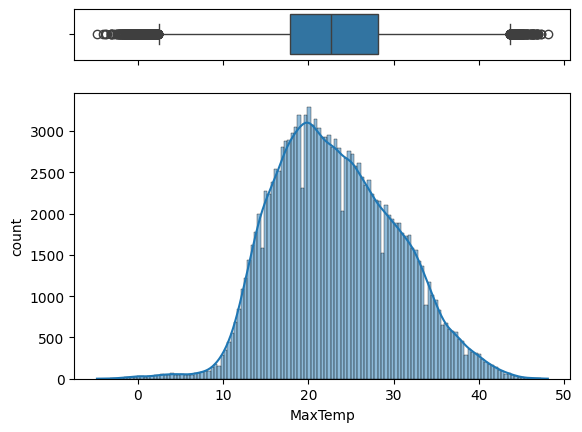

In [45]:
fig, (ax_box, ax_hist) = plt.subplots(2, 
                                    sharex = True, 
                                    gridspec_kw = {'height_ratios': (.15, .85)}) 
 
sns.boxplot(x = class_data['MaxTemp'], ax = ax_box)
sns.histplot(x = class_data['MaxTemp'], ax = ax_hist, bins = 'auto', kde = True)
 
ax_box.set(xlabel = '') 
ax_hist.set(xlabel = 'MaxTemp')
ax_hist.set(ylabel = 'count')
 
plt.show()

<Axes: xlabel='RainTomorrow', ylabel='count'>

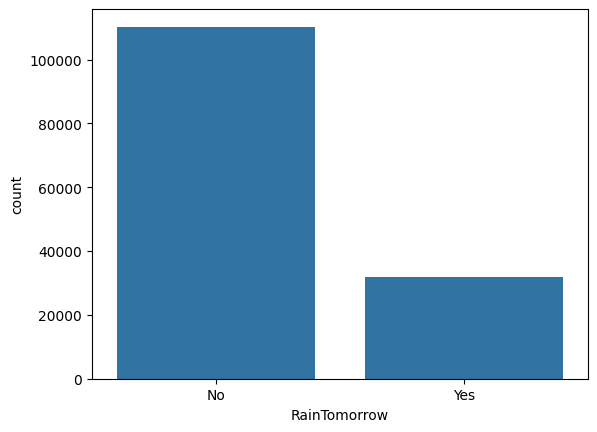

In [46]:
sns.countplot(x = 'RainTomorrow', data = class_data)

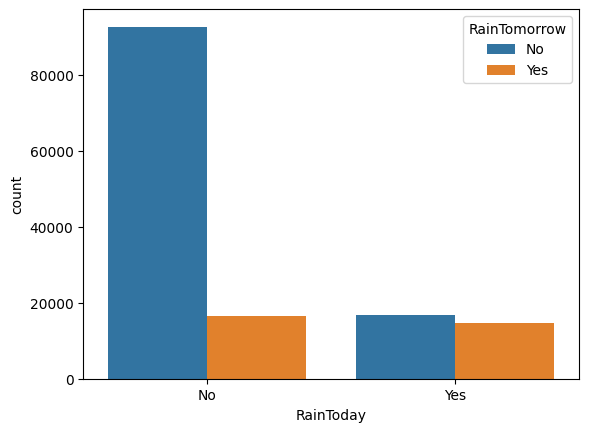

In [47]:
sns.countplot(x = 'RainToday', hue = 'RainTomorrow', data = class_data);

In [48]:
str_cols = class_data.select_dtypes(include=['object']).columns.tolist()

print("Categorical variables:")
print(str_cols)

Categorical variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [49]:
for i in str_cols:
    print(i, class_data[i].isnull().sum())

Date 0
Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [50]:
for i in str_cols:
    class_data[i].fillna(class_data[i].mode()[0], inplace=True)

In [51]:
class_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
class_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

/var/folders/d0/0j41qjnd51vdsqjbyvxmlgyh0000gn/T/ipykernel_12589/2048983535.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  class_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
/var/folders/d0/0j41qjnd51vdsqjbyvxmlgyh0000gn/T/ipykernel_12589/2048983535.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  class_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)


In [52]:
class_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [53]:
num_cols = class_data.select_dtypes(include=[np.number]).columns.tolist()

print("Neumeric variables:")
print(num_cols)

Neumeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [54]:
for i in num_cols:
    print(i, class_data[i].isnull().sum())

MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
RainToday 0
RainTomorrow 0


In [55]:
for i in num_cols:
    class_data[i].fillna(class_data[i].median(), inplace=True)

In [56]:
class_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [57]:
class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  object 
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  object 
 10  WindDir3pm     145460 non-null  object 
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [58]:
class_data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [59]:
str_cols=class_data.select_dtypes(include='object').columns.to_list()
print(str_cols)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


In [60]:
class_data.drop(columns='Date', inplace=True)

In [61]:
str_cols=class_data.select_dtypes(include='object').columns.to_list()
print(str_cols)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']


<Axes: >

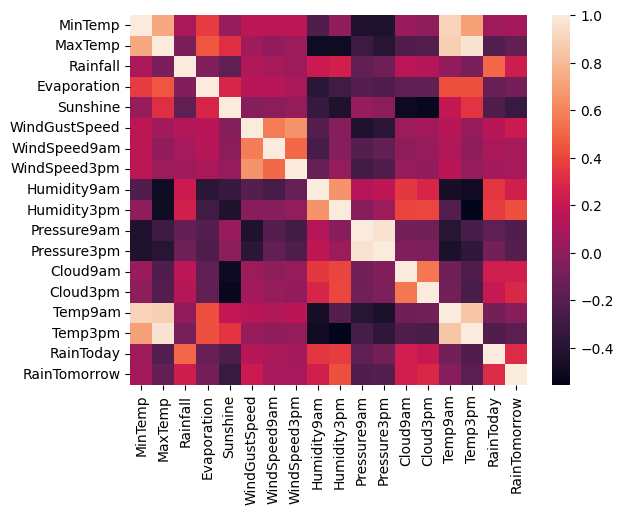

In [62]:
sns.heatmap(class_data.select_dtypes(include=[np.number]).corr())

In [63]:
scaler = StandardScaler()
te = TargetEncoder()

In [64]:
X, y = class_data.drop('RainTomorrow', axis=1), class_data['RainTomorrow']

In [65]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
str_cols = X.select_dtypes(include=['object']).columns.tolist()

In [66]:
transformer = ColumnTransformer(transformers=[
    ('scaler', scaler, num_cols),
    ('cat', te, str_cols)
])

pipe = Pipeline([('preprocessing', transformer), ('model', LogisticRegression(max_iter=1000, random_state=42))])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
pipe.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [69]:
y_pred = pipe.predict(X_test)

Accuracy: 0.8418465557541592
F1 (binary): 0.5697185074347704
F1 (macro): 0.7364184965212849

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.71      0.47      0.57      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092


Confusion matrix:
 [[21445  1227]
 [ 3374  3046]]

Class distribution (test):
RainTomorrow
0    22672
1     6420
Name: count, dtype: int64
Baseline (most frequent) accuracy: 0.7793207754709198

ROC AUC: 0.8618750370995718


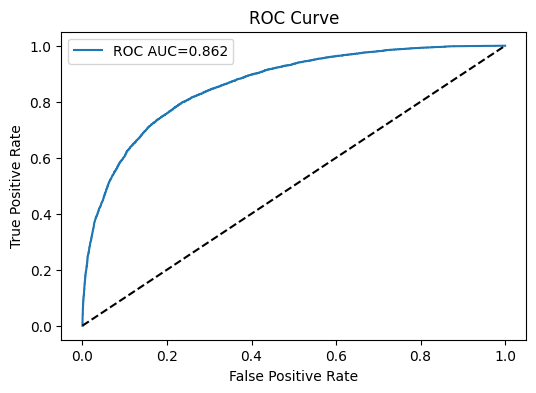

In [70]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 (binary):', f1_score(y_test, y_pred))
print('F1 (macro):', f1_score(y_test, y_pred, average='macro'))
print('\nClassification report:\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion matrix:\n', cm)

print('\nClass distribution (test):')
print(y_test.value_counts())
print('Baseline (most frequent) accuracy:', y_test.value_counts(normalize=True).max())

y_proba = pipe.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print('\nROC AUC:', auc)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC AUC={auc:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [71]:
class LogisticRegressor:
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, tol=1e-6, 
                 l2=0.0, auto_threshold=True):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.tol = tol
        self.l2 = l2
        self.auto_threshold = auto_threshold

        self.coef_ = None
        self.intercept_ = None
        self.threshold_ = 0.5
        

    def _to_numpy(self, X):
        return X.values if hasattr(X, "values") else np.asarray(X)

    
    def _sigmoid(self, z):
        out = np.empty_like(z, dtype=float)
        
        pos_mask = z >= 0
        neg_mask = ~pos_mask

        out[pos_mask] = 1 / (1 + np.exp(-z[pos_mask]))
        exp_z = np.exp(z[neg_mask])
        out[neg_mask] = exp_z / (1 + exp_z)

        return out


    def _compute_best_threshold(self, y_true, proba):
        precision, recall, thresholds = precision_recall_curve(y_true, proba)

        f1 = 2 * precision * recall / (precision + recall + 1e-12)

        best_idx = np.argmax(f1[:-1])
        best_t = thresholds[best_idx]

        return best_t


    def fit(self, X, y):
        X_arr = self._to_numpy(X)
        y_arr = self._to_numpy(y).astype(float)

        if X_arr.ndim == 1:
            X_arr = X_arr.reshape(-1, 1)

        y_arr = y_arr.reshape(-1)

        n_samples, n_features = X_arr.shape

        self.coef_ = np.random.normal(size=n_features)
        self.intercept_ = 0.0

        for _ in range(self.n_iterations):
            z = X_arr @ self.coef_ + self.intercept_
            y_pred = self._sigmoid(z)

            error = y_pred - y_arr

            dw = (X_arr.T @ error) / n_samples + self.l2 * self.coef_
            db = error.mean()

            old_coef = self.coef_.copy()
            old_intercept = self.intercept_

            self.coef_ -= self.learning_rate * dw
            self.intercept_ -= self.learning_rate * db

            if np.linalg.norm(self.coef_ - old_coef) < self.tol \
               and abs(self.intercept_ - old_intercept) < self.tol:
                break

        if self.auto_threshold:
            proba_train = self.predict_proba(X)[:, 1]
            self.threshold_ = self._compute_best_threshold(y_arr, proba_train)

        return self


    def predict_proba(self, X):
        X_arr = self._to_numpy(X)
        if X_arr.ndim == 1:
            X_arr = X_arr.reshape(-1, 1)

        z = X_arr @ self.coef_ + self.intercept_
        proba_1 = self._sigmoid(z)
        return np.column_stack([1 - proba_1, proba_1])


    def predict(self, X):
        proba_1 = self.predict_proba(X)[:, 1]
        return (proba_1 >= self.threshold_).astype(int)


In [72]:
pipe_custom = Pipeline([('preprocessing', transformer), ('model', LogisticRegressor(learning_rate=0.1, n_iterations=500))])
pipe_custom.fit(X_train, y_train)
y_pred_custom = pipe_custom.predict(X_test)

In [73]:
thr_custom = pipe_custom.named_steps['model'].threshold_
print('Threshold (custom LogisticRegressor):', thr_custom)

Threshold (custom LogisticRegressor): 0.3154310905012035


Accuracy (pipe_custom): 0.8203973600989963
F1 (binary): 0.6195296002330154
F1 (macro): 0.7509922190722118

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88     22672
           1       0.58      0.66      0.62      6420

    accuracy                           0.82     29092
   macro avg       0.74      0.76      0.75     29092
weighted avg       0.83      0.82      0.82     29092


Confusion matrix:
 [[19613  3059]
 [ 2166  4254]]


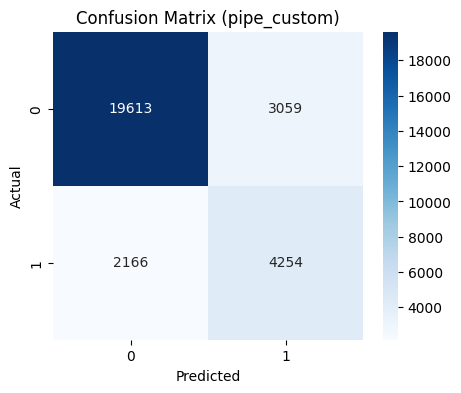


Class distribution (test):
RainTomorrow
0    22672
1     6420
Name: count, dtype: int64
Baseline (most frequent) accuracy: 0.7793207754709198

ROC AUC: 0.8554963565472226


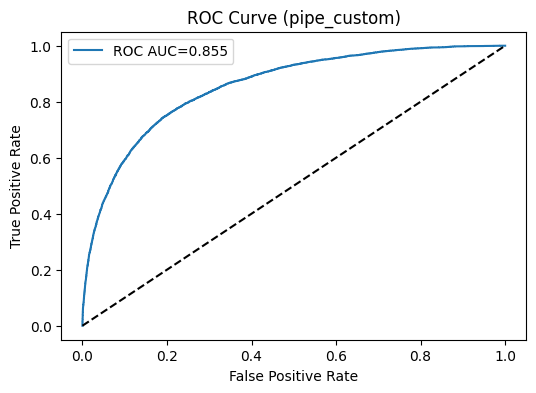

In [74]:
# Оценка качества pipe_custom
print('Accuracy (pipe_custom):', accuracy_score(y_test, y_pred_custom))
print('F1 (binary):', f1_score(y_test, y_pred_custom))
print('F1 (macro):', f1_score(y_test, y_pred_custom, average='macro'))
print('\nClassification report:\n', classification_report(y_test, y_pred_custom))

# Матрица неточностей
cm = confusion_matrix(y_test, y_pred_custom)
print('\nConfusion matrix:\n', cm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (pipe_custom)')
plt.show()

print('\nClass distribution (test):')
print(y_test.value_counts())
print('Baseline (most frequent) accuracy:', y_test.value_counts(normalize=True).max())

y_proba = pipe_custom.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print('\nROC AUC:', auc)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC AUC={auc:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (pipe_custom)')
plt.legend()
plt.show()



In [75]:
# GridSearchCV для LogisticRegression
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear']
}

pipe = Pipeline([('preprocessing', transformer), ('model', LogisticRegression(max_iter=1000, random_state=42))])

gs = GridSearchCV(pipe, param_grid=param_grid, cv=5,
                    scoring='roc_auc', n_jobs=-1)

In [76]:
# Обучаем и выводим лучшие параметры и метрику по CV
gs.fit(X_train, y_train)
print('\n=== GridSearchCV для LogisticRegression ===')
print('Best params:', gs.best_params_)
print('Best CV score (ROC AUC):', gs.best_score_)


=== GridSearchCV для LogisticRegression ===
Best params: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Best CV score (ROC AUC): 0.8619944202501546


In [77]:
# Оценка на тестовой выборке
best_pipe = gs.best_estimator_
y_pred_gs = best_pipe.predict(X_test)

In [78]:
y_proba_gs = best_pipe.predict_proba(X_test)[:, 1]


=== Результаты GridSearchCV (LogisticRegression) ===
Accuracy: 0.8420184243090885
F1 (binary): 0.5705475612035134
F1 (macro): 0.7368764932086393

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     22672
           1       0.71      0.48      0.57      6420

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092


Confusion matrix:
 [[21443  1229]
 [ 3367  3053]]


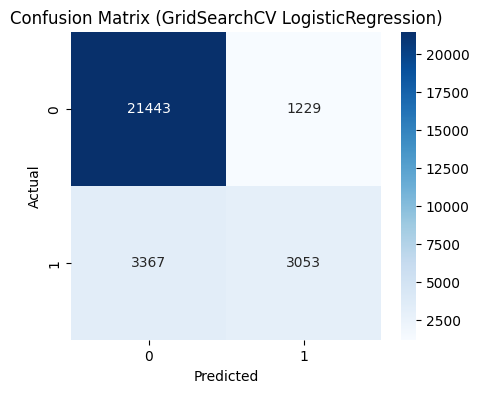


ROC AUC: 0.8620603013694415


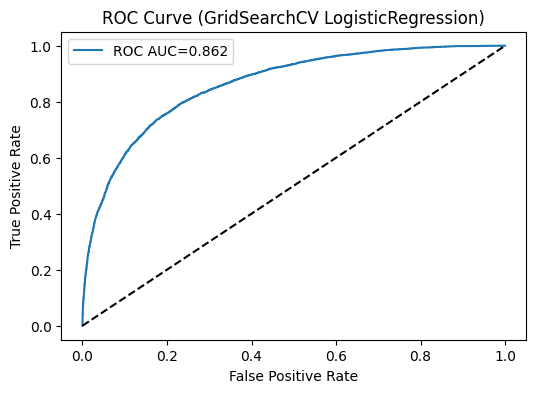

In [79]:
print('\n=== Результаты GridSearchCV (LogisticRegression) ===')
print('Accuracy:', accuracy_score(y_test, y_pred_gs))
print('F1 (binary):', f1_score(y_test, y_pred_gs))
print('F1 (macro):', f1_score(y_test, y_pred_gs, average='macro'))
print('\nClassification report:\n', classification_report(y_test, y_pred_gs))

cm = confusion_matrix(y_test, y_pred_gs)
print('\nConfusion matrix:\n', cm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (GridSearchCV LogisticRegression)')
plt.show()

auc = roc_auc_score(y_test, y_proba_gs)
print('\nROC AUC:', auc)
fpr, tpr, _ = roc_curve(y_test, y_proba_gs)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC AUC={auc:.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (GridSearchCV LogisticRegression)')
plt.legend()
plt.show()